# Compressão de Imagem com K-means

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from src.clustering.kmeans import kMeans_init_centroids, run_kMeans, find_closest_centroids
from src.visualization.plot_3d import plot_kMeans_RGB, show_centroid_colors

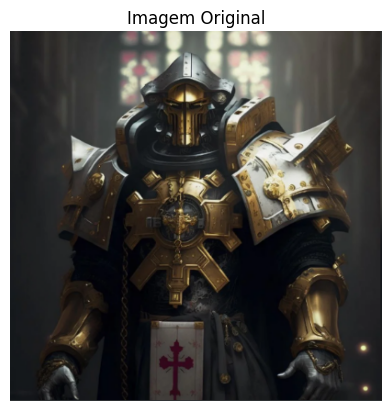


ANÁLISE DE CORES DA IMAGEM
Dimensões da imagem:     403 × 405 pixels
Total de pixels:         163,215
Cores únicas:            43,276
Percentual de únicas:    26.51%
Pixels repetidos:        119,939


In [34]:
# Carregar a imagem
original_img = plt.imread('data/img/image.png')

# Visualizar a imagem
plt.imshow(original_img)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Achatar a imagem para analisar os pixels
X_img = np.reshape(original_img, (-1, 3))

# Encontrar pixels únicos (cores únicas)
unique_pixels = np.unique(X_img, axis=0)

# Informações
total_pixels = X_img.shape[0]
unique_colors = unique_pixels.shape[0]
percentage = (unique_colors / total_pixels) * 100

print("\n" + "="*60)
print("ANÁLISE DE CORES DA IMAGEM")
print("="*60)
print(f"Dimensões da imagem:     {original_img.shape[0]} × {original_img.shape[1]} pixels")
print(f"Total de pixels:         {total_pixels:,}")
print(f"Cores únicas:            {unique_colors:,}")
print(f"Percentual de únicas:    {percentage:.2f}%")
print(f"Pixels repetidos:        {total_pixels - unique_colors:,}")
print("="*60)

## Composição RGB de uma Imagem

In [25]:
# Verificando a dimensão da imagem
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (403, 405, 3)


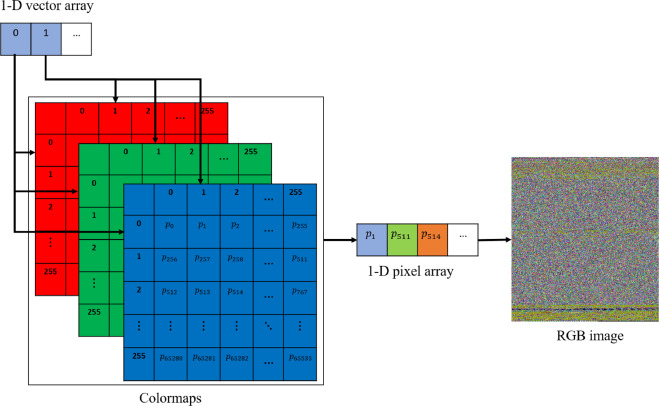

In [45]:
# Transformar a matriz original_img em uma matriz bidimensional (porque?)
# A matriz resultante terá (número de pixels) linhas e 3 colunas (representando RGB)
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img = X_img.astype(np.float32)
X_img.shape

(163215, 3)

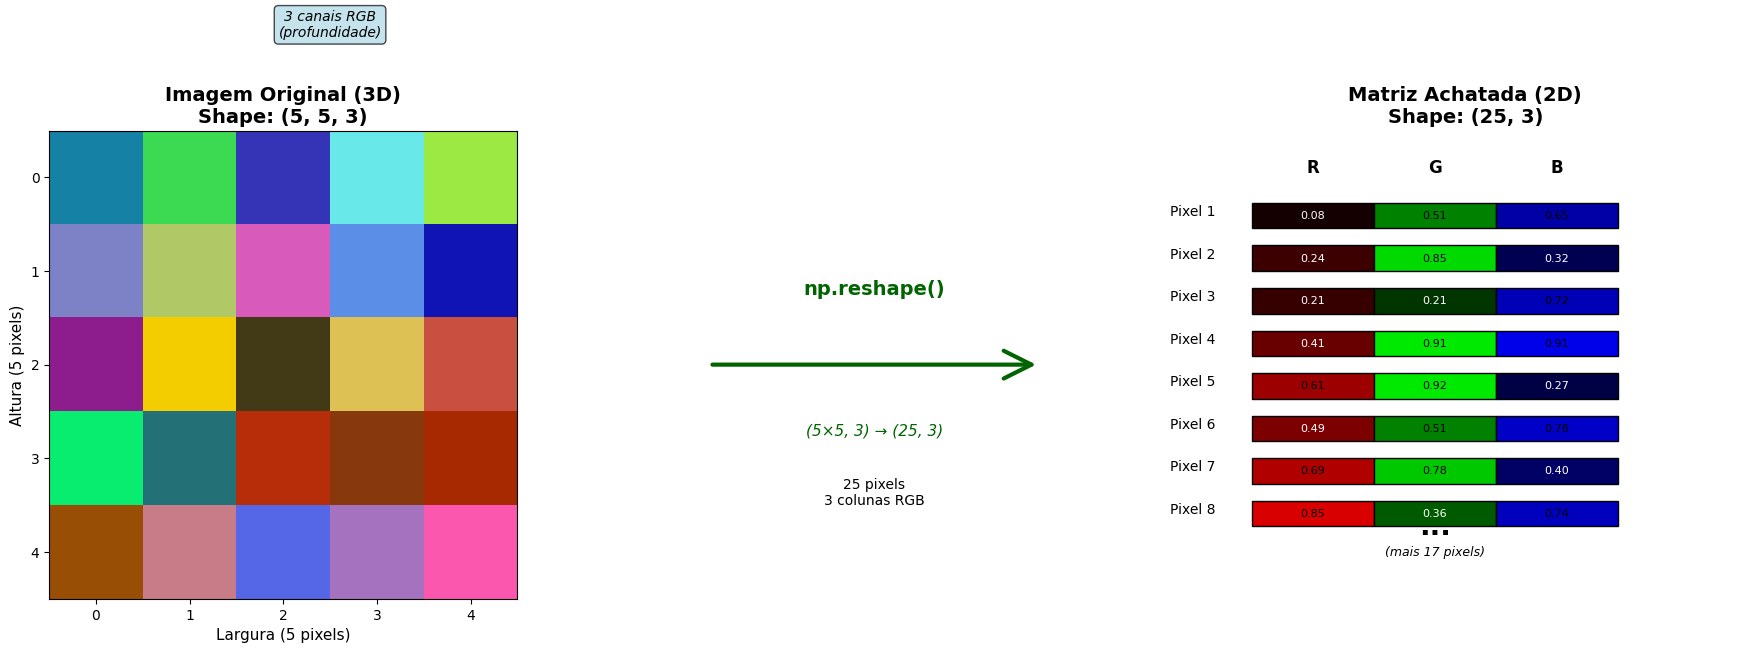

In [46]:
# Número de cores (clusters) que queremos encontrar (testar a diferença entre vários K)
K = 32

# Número máximo de iterações para o algoritmo K-Means
max_iters = 10

# Inicializar centróides aleatoriamente a partir dos pixels da imagem
initial_centroids = kMeans_init_centroids(X_img, K)

# Executar o algoritmo K-Means para encontrar os centróides e atribuições de cluster
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [47]:
# Exibir a forma de idx e os centróides mais próximos para os primeiros cinco elementos
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (163215,)
Closest centroid for the first five elements: [20 20 29 29 29]


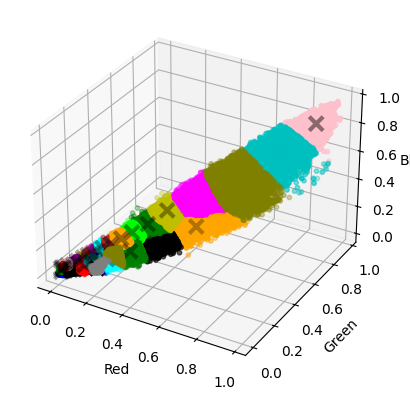

In [48]:
# Chama a função para plotar o resultado do K-Means no espaço RGB (tem que mudar as cores na função)
plot_kMeans_RGB(X_img, centroids, idx, K)

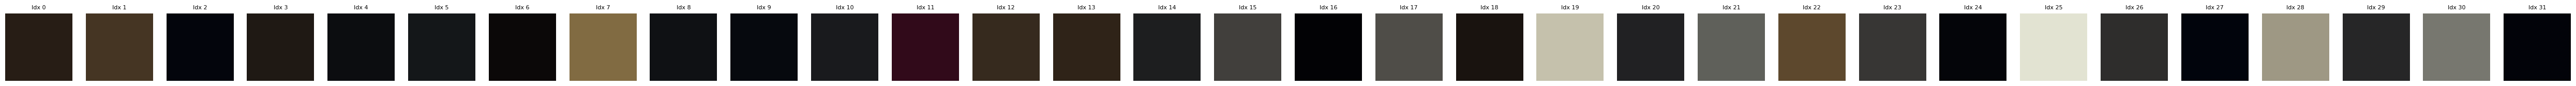

In [49]:
show_centroid_colors(centroids)

In [50]:
# Atribuir a posição de cada pixel ao seu centróide mais próximo usando a função find_closest_centroids
idx = find_closest_centroids(X_img, centroids)

# Substituir cada pixel pelo valor RGB do centróide mais próximo
centroids = centroids.astype(np.float32)
X_recovered = centroids[idx, :]

# Remodelar a matriz bidimensional de volta ao formato original da imagem (altura, largura, RGB)
X_recovered = np.reshape(X_recovered, original_img.shape)

## Avaliando compressão de imagem

Kmeans não é a melhor técnica de compressão de imagem, mas serve para quantização de cores (reduzir paleta de cores).

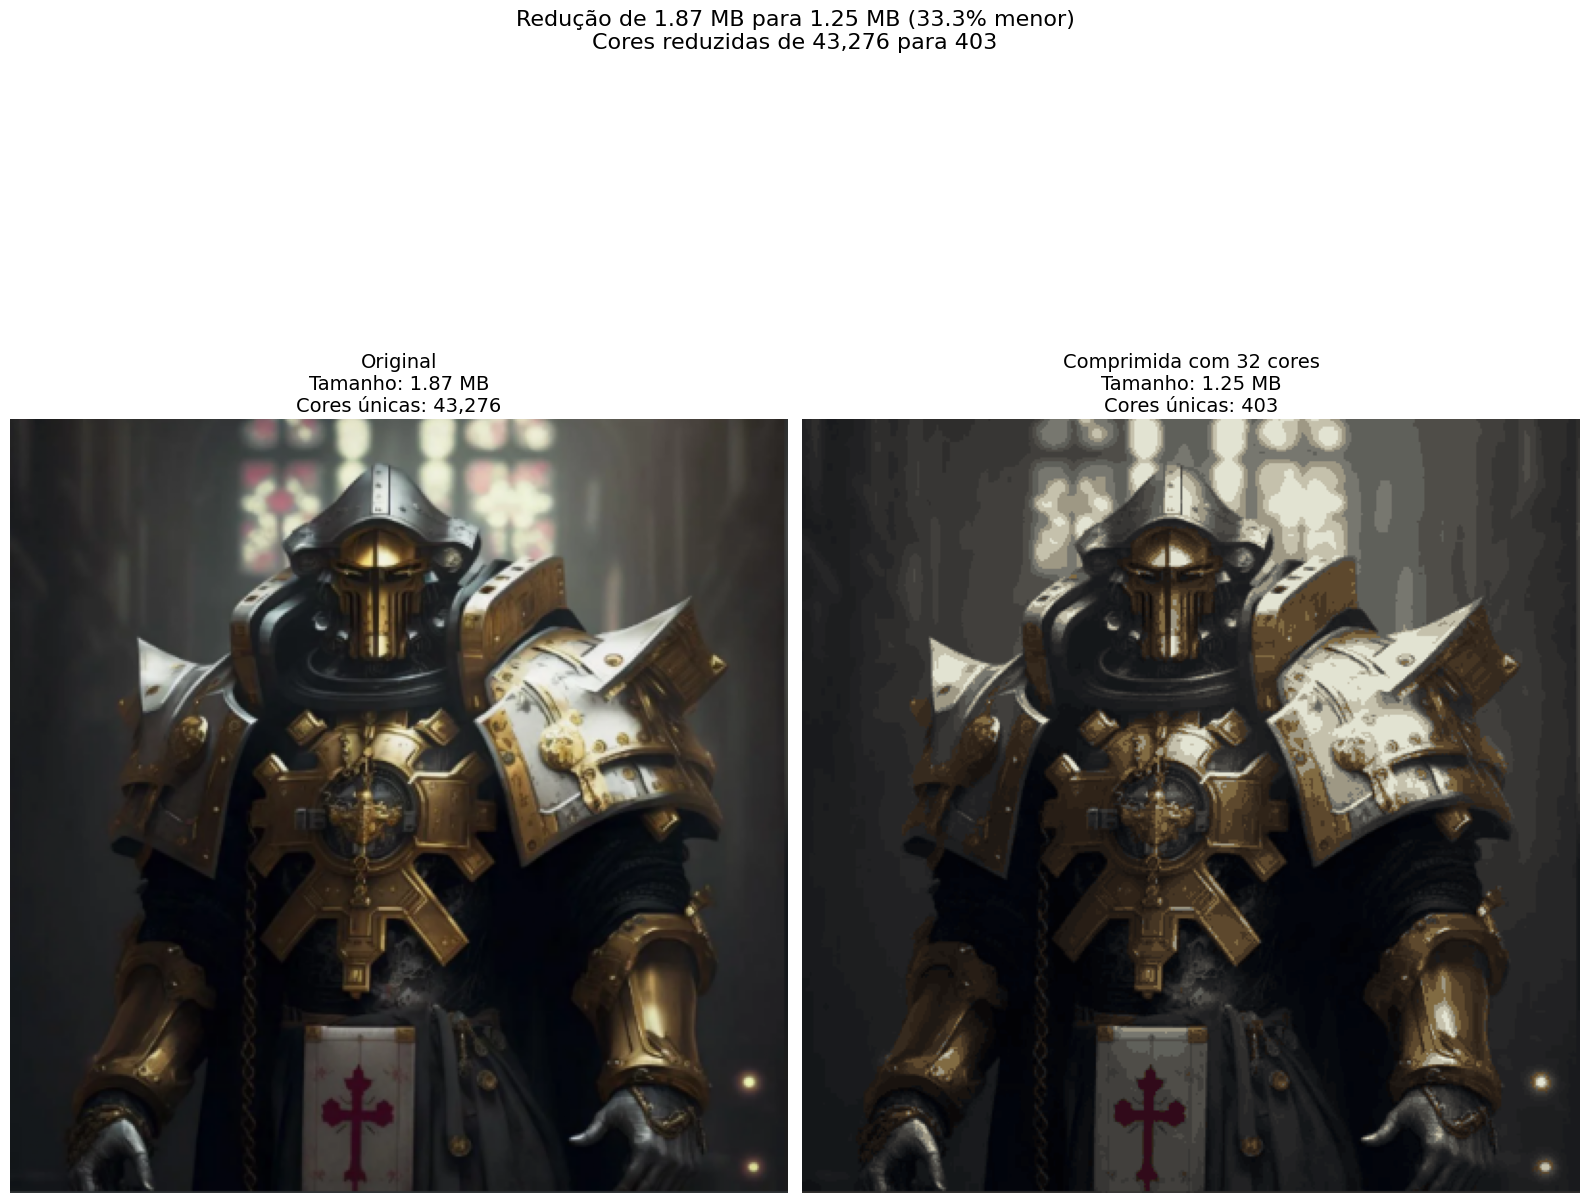

In [52]:
# Calcular cores únicas
unique_pixels_original = np.unique(X_img, axis=0)
unique_colors_original = unique_pixels_original.shape[0]

unique_pixels_compressed = np.unique(X_recovered, axis=0)
unique_colors_compressed = unique_pixels_compressed.shape[0]

# Calcular tamanhos em memória
def get_image_size_mb(img_array):
    """Calcula o tamanho da imagem em MB"""
    return img_array.nbytes / (1024 * 1024)

# Calcular tamanho comprimido (K centróides + índices)
original_size_mb = get_image_size_mb(original_img)
compressed_size_mb = (centroids.nbytes + idx.nbytes) / (1024 * 1024)
compression_ratio = original_size_mb / compressed_size_mb

# Criar uma figura com dois subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(16, 16))

# Desativar os eixos para a figura inteira
plt.axis('off')

# Exibir a imagem original no primeiro subplot
ax[0].imshow(original_img)
ax[0].set_title(f'Original\nTamanho: {original_size_mb:.2f} MB\nCores únicas: {unique_colors_original:,}', 
                fontsize=14)
ax[0].set_axis_off()

# Exibir a imagem comprimida no segundo subplot
ax[1].imshow(X_recovered)
ax[1].set_title(f'Comprimida com {K} cores\nTamanho: {compressed_size_mb:.2f} MB\nCores únicas: {unique_colors_compressed:,}', 
                fontsize=14)
ax[1].set_axis_off()

# Adicionar informações gerais
plt.suptitle(f'Redução de {original_size_mb:.2f} MB para {compressed_size_mb:.2f} MB ({(1 - compressed_size_mb/original_size_mb)*100:.1f}% menor)\nCores reduzidas de {unique_colors_original:,} para {unique_colors_compressed:,}', 
             fontsize=16, y=0.98)

plt.tight_layout()
plt.show()